In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [189]:
path = 'realtor-data.csv'

In [190]:
df = pd.read_csv(path)
df.head()

brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN

In [191]:
df.info

<bound method DataFrame.info of          brokered_by    status     price  bed  bath  acre_lot     street  \
0           103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1            52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2           103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3            31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4            34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   
...              ...       ...       ...  ...   ...       ...        ...   
1048570      68915.0  for_sale  467847.0  5.0   4.0      0.19   773587.0   
1048571      68915.0  for_sale  345249.0  5.0   3.0      0.19   772323.0   
1048572      61150.0  for_sale  325000.0  NaN   NaN      0.68  1024251.0   
1048573      68915.0  for_sale  456122.0  5.0   4.0      0.19   273557.0   
1048574      61150.0  for_sale  325000.0  NaN   NaN      0.69  1024490.0   

                   city        state  zip_code  house_s

In [192]:
print(df.dtypes)

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object


In [193]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.to_csv('real_data.csv', index=False)

In [194]:
path1 = 'real_data.csv'

In [195]:
df = pd.read_csv(path1)
df.head()

brokered_by    status      price  bed  bath  acre_lot     street  \
0      92147.0  for_sale   110000.0  7.0   3.0      0.09  1842706.0   
1      94933.0  for_sale   950000.0  5.0   4.0      0.99  1260473.0   
2     103341.0  for_sale  6899000.0  4.0   6.0      0.83    17467.0   
3      21163.0  for_sale   525000.0  3.0   3.0      0.45  1813270.0   
4      67455.0  for_sale   289900.0  3.0   2.0      0.36  1698080.0   

           city           state  zip_code  house_size prev_sold_date  
0        Dorado     Puerto Rico     949.0      1192.0      6/28/2019  
1  Saint Thomas  Virgin Islands     802.0      5000.0     10/11/2013  
2  Saint Thomas  Virgin Islands     802.0      4600.0       4/5/2018  
3        Agawam   Massachusetts    1001.0      2314.0      6/25/2014  
4        Agawam   Massachusetts    1001.0      1276.0     10/12/2012

In [196]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [197]:
df.info

<bound method DataFrame.info of         brokered_by    status      price  bed  bath  acre_lot     street  \
0           92147.0  for_sale   110000.0  7.0   3.0      0.09  1842706.0   
1           94933.0  for_sale   950000.0  5.0   4.0      0.99  1260473.0   
2          103341.0  for_sale  6899000.0  4.0   6.0      0.83    17467.0   
3           21163.0  for_sale   525000.0  3.0   3.0      0.45  1813270.0   
4           67455.0  for_sale   289900.0  3.0   2.0      0.36  1698080.0   
...             ...       ...        ...  ...   ...       ...        ...   
328151      81759.0  for_sale   325000.0  4.0   3.0      0.30  1198000.0   
328152      92851.0  for_sale   305900.0  4.0   3.0      0.18   771508.0   
328153     109440.0  for_sale   380000.0  4.0   3.0      0.38   665554.0   
328154      70650.0  for_sale   303000.0  4.0   2.0      0.24   443392.0   
328155      92851.0  for_sale   269000.0  4.0   2.0      0.19   760137.0   

                  city           state  zip_code  house

In [198]:
df.head()

brokered_by    status      price  bed  bath  acre_lot     street  \
0      92147.0  for_sale   110000.0  7.0   3.0      0.09  1842706.0   
1      94933.0  for_sale   950000.0  5.0   4.0      0.99  1260473.0   
2     103341.0  for_sale  6899000.0  4.0   6.0      0.83    17467.0   
3      21163.0  for_sale   525000.0  3.0   3.0      0.45  1813270.0   
4      67455.0  for_sale   289900.0  3.0   2.0      0.36  1698080.0   

           city           state  zip_code  house_size prev_sold_date  
0        Dorado     Puerto Rico     949.0      1192.0      6/28/2019  
1  Saint Thomas  Virgin Islands     802.0      5000.0     10/11/2013  
2  Saint Thomas  Virgin Islands     802.0      4600.0       4/5/2018  
3        Agawam   Massachusetts    1001.0      2314.0      6/25/2014  
4        Agawam   Massachusetts    1001.0      1276.0     10/12/2012

In [199]:
real_data = pd.read_csv('real_data.csv')

real_data['prev_sold_date'] = pd.to_datetime(real_data['prev_sold_date'])
real_data['brokered_by'] = real_data['brokered_by'].astype(int)
real_data['bed'] = real_data['bed'].astype(int)
real_data['bath'] = real_data['bath'].astype(int)
real_data['acre_lot'] = real_data['acre_lot'].astype(int)
real_data['street'] = real_data['street'].astype(int)
real_data['zip_code'] = real_data['zip_code'].astype(int)
real_data['house_size'] = real_data['house_size'].astype(int)
real_data['price'] = real_data['price'].astype(int)

real_data.to_csv('real_data_cleaned.csv', index=False)

In [200]:
data = 'real_data_cleaned.csv'

In [201]:
df = pd.read_csv(data)
df.head()

brokered_by    status    price  bed  bath  acre_lot   street          city  \
0        92147  for_sale   110000    7     3         0  1842706        Dorado   
1        94933  for_sale   950000    5     4         0  1260473  Saint Thomas   
2       103341  for_sale  6899000    4     6         0    17467  Saint Thomas   
3        21163  for_sale   525000    3     3         0  1813270        Agawam   
4        67455  for_sale   289900    3     2         0  1698080        Agawam   

            state  zip_code  house_size prev_sold_date  
0     Puerto Rico       949        1192     2019-06-28  
1  Virgin Islands       802        5000     2013-10-11  
2  Virgin Islands       802        4600     2018-04-05  
3   Massachusetts      1001        2314     2014-06-25  
4   Massachusetts      1001        1276     2012-10-12

In [202]:
df.dtypes

brokered_by        int64
status            object
price              int64
bed                int64
bath               int64
acre_lot           int64
street             int64
city              object
state             object
zip_code           int64
house_size         int64
prev_sold_date    object
dtype: object

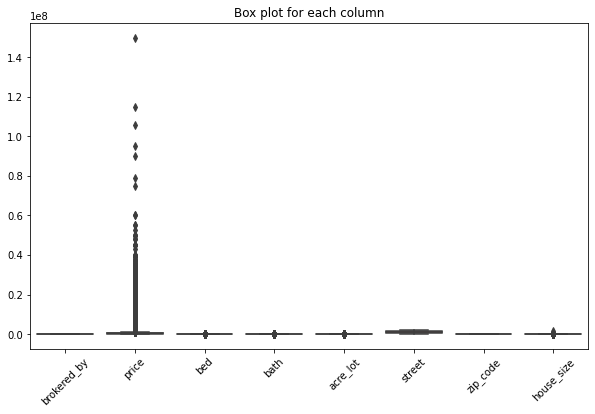

In [203]:
data = 'real_data_cleaned.csv'
real_data = pd.read_csv(data)

plt.figure(figsize=(10,6))
sns.boxplot(data=real_data)
plt.title('Box plot for each column')
plt.xticks(rotation=45)
plt.show()

Q1 = real_data.quantile(0.25)
Q3 = real_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

real_data_no_outliers = real_data[~((real_data < lower_bound) | (real_data > upper_bound)).any(axis=1)]

real_data_no_outliers.to_csv(data, index=False)

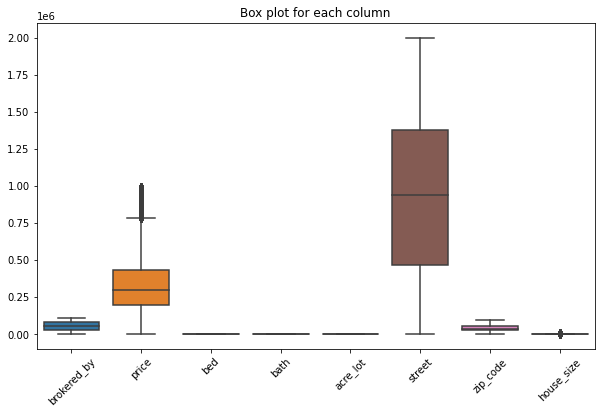

In [204]:
data = 'real_data_cleaned.csv'
real_data = pd.read_csv(data)

plt.figure(figsize=(10,6))
sns.boxplot(data=real_data)
plt.title('Box plot for each column')
plt.xticks(rotation=45)
plt.show()

Q1 = real_data.quantile(0.25)
Q3 = real_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

real_data_no_outliers = real_data[~((real_data < lower_bound) | (real_data > upper_bound)).any(axis=1)]

real_data_no_outliers.to_csv(data, index=False)

In [205]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('real_data_cleaned.csv')

int_columns = [col for col in data.columns if data[col].dtype == 'int64']

scaler = MinMaxScaler()
data[int_columns] = scaler.fit_transform(data[int_columns])

data.to_csv('real_data_cleaned.csv', index=False)

In [206]:
data = 'real_data_cleaned.csv'
df = pd.read_csv(data)
df.head()

brokered_by    status     price       bed      bath  acre_lot    street  \
0     0.192143  for_sale  0.673077  0.333333  0.666667       0.0  0.906121   
1     0.612437  for_sale  0.371666  0.333333  0.333333       0.0  0.848555   
2     0.884313  for_sale  0.493461  0.333333  0.333333       0.0  0.622081   
3     0.123005  for_sale  0.955128  0.666667  0.666667       0.0  0.029572   
4     0.567231  for_sale  0.352563  0.333333  0.333333       0.0  0.653781   

      city          state  zip_code  house_size prev_sold_date  
0   Agawam  Massachusetts  0.000000    0.626152     2014-06-25  
1   Agawam  Massachusetts  0.000000    0.327189     2012-10-12  
2   Agawam  Massachusetts  0.000000    0.384793     1986-11-20  
3  Amherst  Massachusetts  0.000011    0.779666     1992-06-24  
4  Amherst  Massachusetts  0.000011    0.328341     2021-08-19

In [207]:
from sklearn.impute import SimpleImputer

data = pd.read_csv('real_data_cleaned.csv')
imputer = SimpleImputer(strategy='median')
columns_with_missing_values = data.columns[data.isnull().any()]
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])
data.to_csv('real_data_cleaned.csv', index=False)

ValueError: at least one array or dtype is required

In [208]:
missing_values = data.isnull().sum()
print(missing_values)

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [209]:
data = data.sort_values(by='house_size')
data.head()

brokered_by    status     price       bed      bath  acre_lot  \
48991      0.306296  for_sale  0.217820  0.333333  0.666667       0.0   
49706      0.479463  for_sale  0.179486  0.666667  0.333333       0.0   
98729      0.310109  for_sale  0.742307  1.000000  1.000000       0.0   
49343      0.011921  for_sale  0.012819  0.000000  0.000000       0.0   
114256     0.276516  for_sale  0.144742  0.000000  0.000000       0.0   

          street       city     state  zip_code  house_size prev_sold_date  
48991   0.414599  Baltimore  Maryland  0.223224    0.000000     2006-03-02  
49706   0.417032  Baltimore  Maryland  0.223224    0.000000     2020-03-09  
98729   0.644232  Kissimmee   Florida  0.372683    0.016705     2016-05-24  
49343   0.225028  Baltimore  Maryland  0.223224    0.023041     2018-05-22  
114256  0.188276  Englewood   Florida  0.366918    0.033410     2007-03-22

In [210]:
data = data.sort_values(by='house_size', ascending=False)
data.head()

brokered_by    status     price       bed      bath  acre_lot  \
149644     0.572152  for_sale  0.320512  0.333333  0.333333       0.0   
169707     0.576710  for_sale  0.865384  0.333333  0.666667       0.0   
222842     0.841959  for_sale  0.724359  0.666667  1.000000       0.0   
151278     0.415037  for_sale  0.506410  0.666667  1.000000       0.0   
181646     0.719262  for_sale  0.665384  1.000000  1.000000       0.0   

          street          city      state  zip_code  house_size prev_sold_date  
149644  0.817094         Parma       Ohio  0.476366         1.0     2011-12-16  
169707  0.667556     Davenport       Iowa  0.572107         1.0     2009-08-04  
222842  0.852094        Owasso   Oklahoma  0.806816         1.0     2018-08-01  
151278  0.804206  Canal Fulton       Ohio  0.481667         1.0     2019-08-08  
181646  0.436568     Rochester  Minnesota  0.606333         1.0     2015-06-26

In [211]:
average_price_by_city = data.groupby('city')['price'].mean()

print(average_price_by_city)

city
Aaronsburg       0.179485
Abbeville        0.227272
Abbotsford       0.179903
Abbottstown      0.289640
Aberdeen         0.433916
                   ...   
Zolfo Springs    0.330127
Zumbro Falls     0.330127
Zumbrota         0.378477
Zuni             0.333204
Zwolle           0.316431
Name: price, Length: 8966, dtype: float64


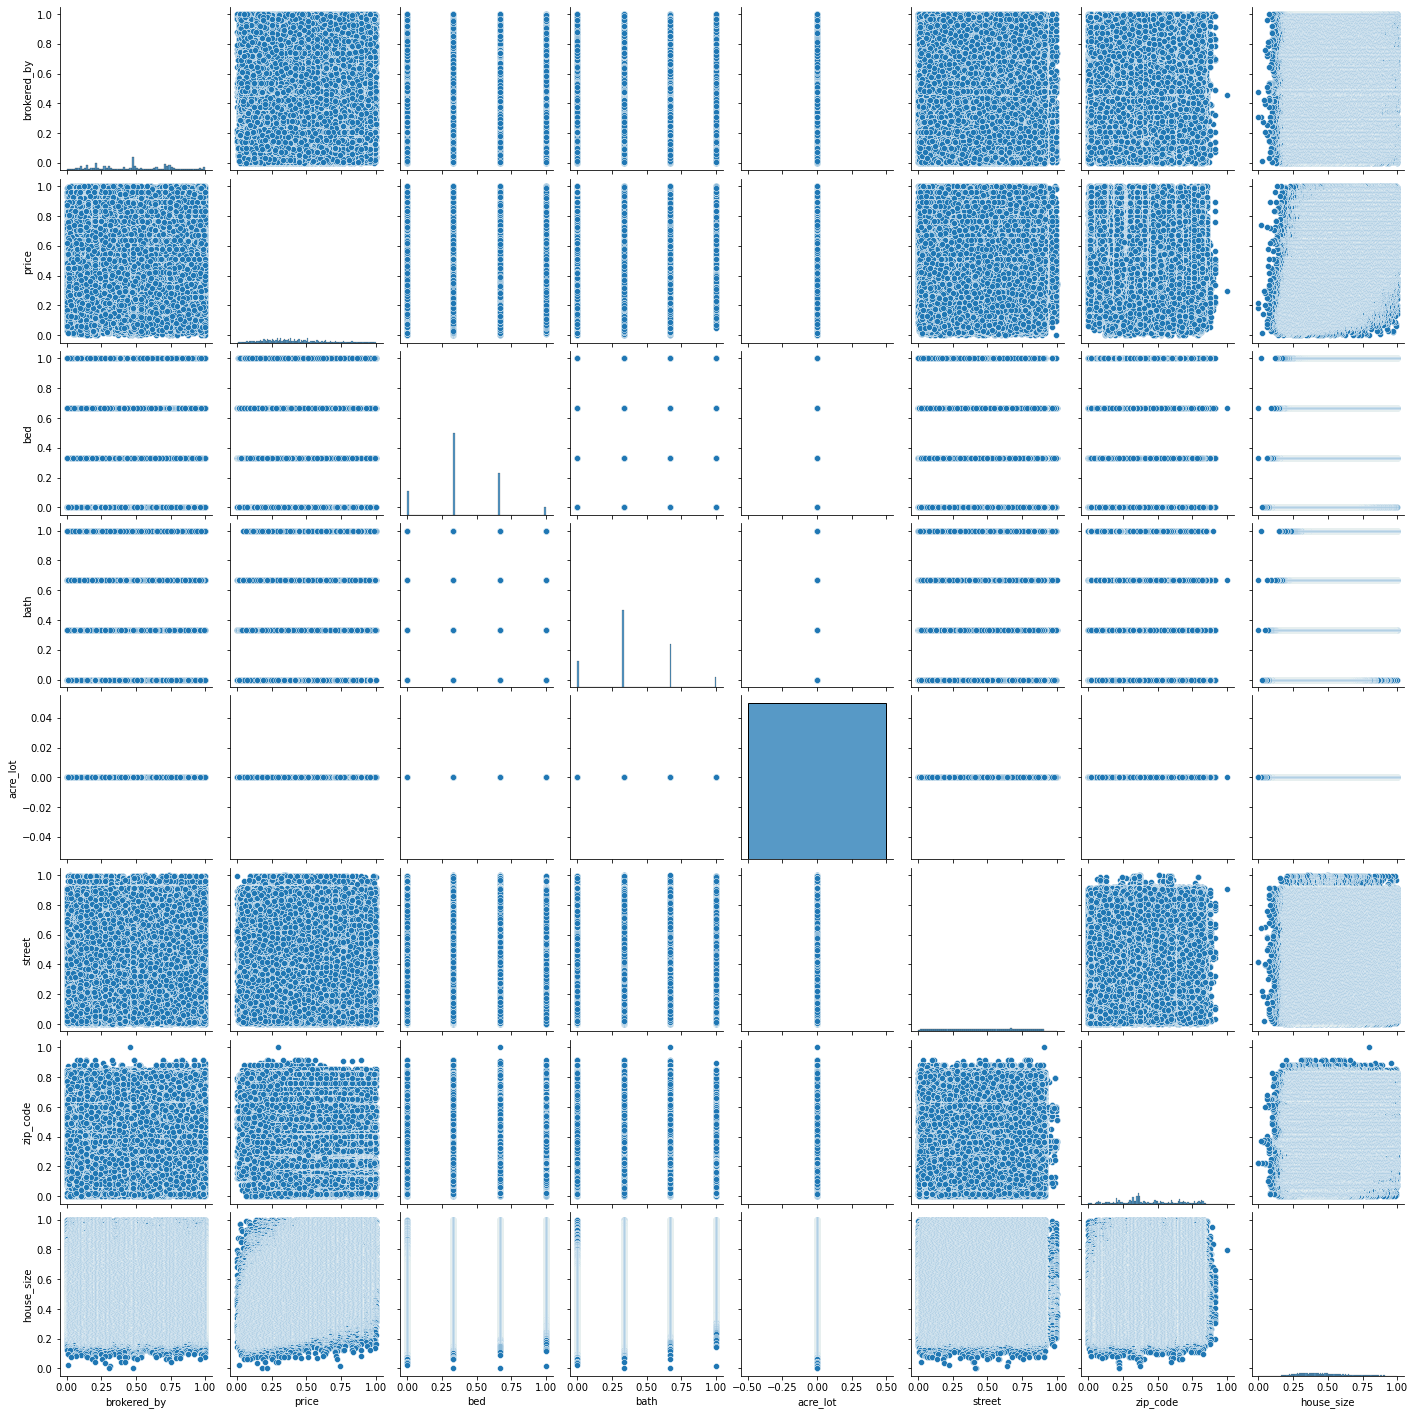

In [212]:
sns.pairplot(data)
plt.show()

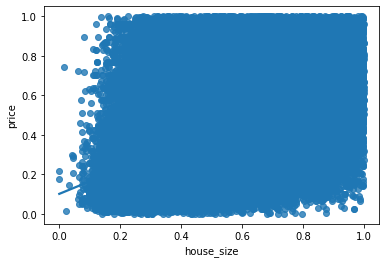

In [214]:
sns.regplot(x="house_size", y="price", data=data)
plt.show()

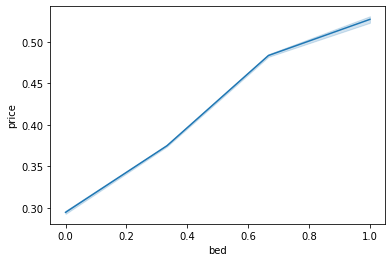

In [215]:
sns.lineplot(x="bed", y="price", data=data)
plt.show()

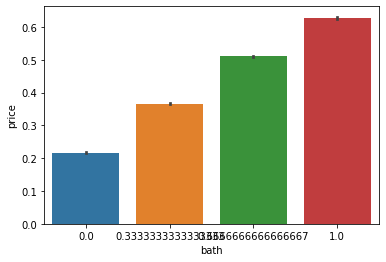

In [216]:
sns.barplot(x="bath", y="price", data=data)
plt.show()

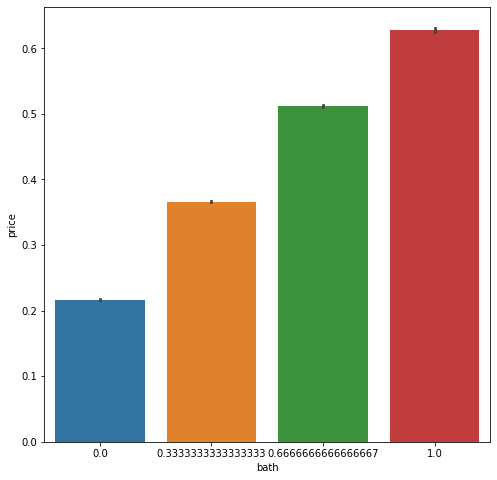

In [220]:
plt.figure(figsize=(8, 8))
sns.barplot(x="bath", y="price", data=data)
plt.show()

In [221]:
import cufflinks as cf

In [222]:
#data['price'].iplot(kind='line', xTitle='X-axis Title', yTitle='Y-axis Title', title='Line Plot', colors=['blue'])

In [223]:
#data[['column1', 'column2']].iplot(kind='area', fill=True, xTitle='X-axis Title', yTitle='Y-axis Title', title='Area Plot')

In [224]:
#data['column'].iplot(kind='hist', bins=30, xTitle='X-axis Title', yTitle='Y-axis Title', title='Histogram')

In [225]:
#data['column'].value_counts().iplot(kind='bar', xTitle='X-axis Title', yTitle='Y-axis Title', title='Bar Chart')

In [226]:
#data['column'].value_counts().iplot(kind='pie', labels='column', title='Pie Chart')

In [227]:
#data[['column1', 'column2']].iplot(kind='box', xTitle='X-axis Title', yTitle='Y-axis Title', title='Box Plot')

In [228]:
#data.iplot(kind='scatter', x='column1', y='column2', mode='markers', xTitle='X-axis Title', yTitle='Y-axis Title',
 #          title='Scatter Plot')

In [229]:
#data.iplot(kind='bubble', x='column1', y='column2', size='column3', xTitle='X-axis Title', yTitle='Y-axis Title',
 #          title='Bubble Plot')

In [230]:
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py

chart_studio.tools.set_credentials_file(username='ahmad1020', api_key='HeMORRkkRAxgiyxX2TR1')

In [231]:
sample_data = data.sample(n=5000)

In [232]:
fig = go.Figure(data=go.Scatter(x=sample_data.index, y=sample_data['price'], mode='lines'))

fig.update_layout(
    title='Line Plot',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Price')
)

py.iplot(fig, filename='line_plot')

In [233]:
data = data.sort_values(by='price')
data.head()

brokered_by    status  price       bed      bath  acre_lot    street  \
39681      0.762888  for_sale    0.0  0.666667  0.333333       0.0  0.114728   
173725     0.205290  for_sale    0.0  0.333333  0.333333       0.0  0.996079   
23200      0.221087  for_sale    0.0  0.333333  0.666667       0.0  0.435191   
180572     0.512529  for_sale    0.0  0.000000  0.333333       0.0  0.634007   
58437      0.142171  for_sale    0.0  0.333333  0.333333       0.0  0.341750   

                 city          state  zip_code  house_size prev_sold_date  
39681    Wilkes Barre   Pennsylvania  0.195492    0.432028     2004-12-15  
173725  Spring Valley      Wisconsin  0.593798    0.717454     2016-06-06  
23200    Gloversville       New York  0.122336    0.796083     2008-06-05  
180572         Cokato      Minnesota  0.599916    0.512673     1988-04-30  
58437          Ripley  West Virginia  0.268041    0.459677     2018-12-07

In [234]:
sample_data_sorted = data.sort_values(by='price').head(5000)

In [235]:
fig = go.Figure(data=go.Scatter(x=sample_data_sorted.index, y=sample_data_sorted['price'], mode='lines'))

fig.update_layout(
    title='Linear Plot of Prices',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Price')
)

py.iplot(fig, filename='linear_plot')

In [236]:
fig = go.Figure(data=go.Scatter(x=sample_data.index, y=sample_data['price'], mode='lines', fill='tozeroy'))

fig.update_layout(
    title='Area Plot',
    xaxis=dict(title='Index'),
    yaxis=dict(title='price')
)

py.iplot(fig, filename='area_plot')

In [237]:
fig = go.Figure(data=go.Scatter(x=sample_data_sorted.index, y=sample_data_sorted['price'], mode='lines', fill='tozeroy'))

fig.update_layout(
    title='Area Plot',
    xaxis=dict(title='Index'),
    yaxis=dict(title='price')
)

py.iplot(fig, filename='area_plot')

In [238]:
fig = go.Figure(data=[go.Histogram(x=sample_data['price'])])

fig.update_layout(
    title='Histogram',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Index')
)

py.iplot(fig, filename='histogram')

In [239]:
fig = go.Figure(data=[go.Histogram(x=sample_data_sorted['price'])])

fig.update_layout(
    title='Histogram',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Index')
)

py.iplot(fig, filename='histogram')

In [240]:
fig = go.Figure(data=[go.Bar(x=sample_data_sorted['house_size'], y=sample_data_sorted['price'])])

fig.update_layout(
    title='Bar Chart',
    xaxis=dict(title='house_size'),
    yaxis=dict(title='Price')
)

py.iplot(fig, filename='bar_chart')

In [241]:
pie_data = go.Pie(labels=sample_data_sorted['house_size'], values=sample_data_sorted['price'])
pie_layout = go.Layout(title='Pie Chart')
pie_fig = go.Figure(data=[pie_data], layout=pie_layout)
pie_fig.show()

In [242]:
import plotly.graph_objs as go

# Assuming `sample_data` is your DataFrame
box_data = go.Box(y=sample_data_sorted['price'])
box_layout = go.Layout(title='Box Plot')
box_fig = go.Figure(data=[box_data], layout=box_layout)
box_fig.show()

In [243]:
import plotly.graph_objects as go

scatter_data = go.Scatter(x=sample_data_sorted['house_size'], y=sample_data_sorted['price'], mode='markers')
scatter_layout = go.Layout(title='Scatter Plot')
scatter_fig = go.Figure(data=[scatter_data], layout=scatter_layout)
scatter_fig.show()

In [244]:
fig = go.Figure(data=go.Scatter(x=sample_data_sorted['house_size'], y=sample_data_sorted['price'], mode='markers'))

fig.update_layout(
    title='Scatter Plot',
    xaxis=dict(title='house_size'),
    yaxis=dict(title='price')
)
py.iplot(fig, filename='scatter_plot')

In [246]:
import plotly.express as px
fig = px.pie(sample_data_sorted, values='house_size', names='price', title='Pie Chart')
fig.show()

fig = px.box(sample_data_sorted, y='price', title='Box Plot')
fig.show()

fig = px.scatter(sample_data_sorted, x='house_size', y='price', title='Scatter Plot')
fig.show()

In [267]:
import plotly.graph_objects as go

# Sample data (replace this with your data)
# x = [1, 2, 3, 4, 5]
# y = [10, 20, 30, 40, 50]
bubble_size = [10,20,30,40,50]  # Size of the bubbles

fig = go.Figure(data=go.Scatter(
    x=sample_data_sorted['house_size'],
    y=sample_data_sorted['price'],
    mode='markers',
    marker=dict(size=bubble_size)
))

fig.update_layout(
    title='Bubble Plot',
    xaxis=dict(title='house_size'),
    yaxis=dict(title='price')
)

fig.show()

In [268]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [269]:
data = 'real_data_cleaned.csv'
df = pd.read_csv(data)
df.head()

brokered_by    status     price       bed      bath  acre_lot    street  \
0     0.192143  for_sale  0.673077  0.333333  0.666667       0.0  0.906121   
1     0.612437  for_sale  0.371666  0.333333  0.333333       0.0  0.848555   
2     0.884313  for_sale  0.493461  0.333333  0.333333       0.0  0.622081   
3     0.123005  for_sale  0.955128  0.666667  0.666667       0.0  0.029572   
4     0.567231  for_sale  0.352563  0.333333  0.333333       0.0  0.653781   

      city          state  zip_code  house_size prev_sold_date  
0   Agawam  Massachusetts  0.000000    0.626152     2014-06-25  
1   Agawam  Massachusetts  0.000000    0.327189     2012-10-12  
2   Agawam  Massachusetts  0.000000    0.384793     1986-11-20  
3  Amherst  Massachusetts  0.000011    0.779666     1992-06-24  
4  Amherst  Massachusetts  0.000011    0.328341     2021-08-19

In [270]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['brokered_by', 'street']])

In [271]:
df['prev_sold_date'] = df['prev_sold_date'].fillna('1900-01-01')

In [272]:
df['prev_sold_date'] = df['prev_sold_date'].fillna(method='ffill')  # Forward fill

In [273]:
import pandas as pd

target_date = pd.to_datetime('1900-01-01')

filtered_records = df[df['prev_sold_date'] == target_date]
print(filtered_records)

Empty DataFrame
Columns: [brokered_by, status, price, bed, bath, acre_lot, street, city, state, zip_code, house_size, prev_sold_date]
Index: []


In [274]:
df['prev_sold_date'] = df['prev_sold_date'].fillna(method='bfill')  # Backward fill

In [275]:
import pandas as pd

target_date = pd.to_datetime('1900-01-01')

filtered_records = df[df['prev_sold_date'] == target_date]
print(filtered_records)

Empty DataFrame
Columns: [brokered_by, status, price, bed, bath, acre_lot, street, city, state, zip_code, house_size, prev_sold_date]
Index: []


In [276]:
print(df['prev_sold_date'].isnull().sum())

0


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231697 entries, 0 to 231696
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     231697 non-null  float64
 1   status          231697 non-null  object 
 2   price           231697 non-null  float64
 3   bed             231697 non-null  float64
 4   bath            231697 non-null  float64
 5   acre_lot        231697 non-null  float64
 6   street          231697 non-null  float64
 7   city            231697 non-null  object 
 8   state           231697 non-null  object 
 9   zip_code        231697 non-null  float64
 10  house_size      231697 non-null  float64
 11  prev_sold_date  231697 non-null  object 
dtypes: float64(8), object(4)
memory usage: 21.2+ MB


In [278]:
#encoded_df = pd.get_dummies(df, columns=['categorical_feature'])

In [279]:
df['unique_code'] = df['zip_code'].apply(lambda x: np.log(x + 1))

In [280]:
df['space'] = df['bed'] * df['bath']

In [284]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['space', 'street']])

In [285]:
import pandas as pd

# code to generate polynomial features
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['space', 'street']])

# Convert the transformed features into a DataFrame for visualization
poly_feature_names = poly.get_feature_names(['space', 'street'])
poly_feature_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Display the transformed features DataFrame
print(poly_feature_df.head())

     1     space    street   space^2  space street  street^2
0  1.0  0.222222  0.906121  0.049383      0.201360  0.821055
1  1.0  0.111111  0.848555  0.012346      0.094284  0.720046
2  1.0  0.111111  0.622081  0.012346      0.069120  0.386985
3  1.0  0.444444  0.029572  0.197531      0.013143  0.000874
4  1.0  0.111111  0.653781  0.012346      0.072642  0.427430


In [287]:
from sklearn.decomposition import PCA                                 #Principal Component Analysis reduce dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[['space', 'street']])

In [292]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['city'])
#print(tfidf_matrix.toarray())

#"Term Frequency-Inverse Document Frequency

In [293]:
# df['n_price'] = df['price'].shift(1)                               #Depended on previous value

In [294]:
df['imp_feature'] = df['bed'] * df['bath'] + df['house_size']

In [295]:
df

brokered_by    status     price       bed      bath  acre_lot  \
0          0.192143  for_sale  0.673077  0.333333  0.666667       0.0   
1          0.612437  for_sale  0.371666  0.333333  0.333333       0.0   
2          0.884313  for_sale  0.493461  0.333333  0.333333       0.0   
3          0.123005  for_sale  0.955128  0.666667  0.666667       0.0   
4          0.567231  for_sale  0.352563  0.333333  0.333333       0.0   
...             ...       ...       ...       ...       ...       ...   
231692     0.742305  for_sale  0.416666  0.666667  0.666667       0.0   
231693     0.843012  for_sale  0.392179  0.666667  0.666667       0.0   
231694     0.993626  for_sale  0.487179  0.666667  0.666667       0.0   
231695     0.641445  for_sale  0.388461  0.666667  0.333333       0.0   
231696     0.843012  for_sale  0.344871  0.666667  0.333333       0.0   

          street            city          state  zip_code  house_size  \
0       0.906121          Agawam  Massachusetts  0.000000    0.626152   
1       0.848555          Agawam  Massachusetts  0.000000    0.327189   
2       0.622081          Agawam  Massachusetts  0.000000    0.384793   
3       0.029572         Amherst  Massachusetts  0.000011    0.779666   
4       0.653781         Amherst  Massachusetts  0.000011    0.328341   
...          ...             ...            ...       ...         ...   
231692  0.598644  Harker Heights          Texas  0.834349    0.784562   
231693  0.385507  Harker Heights          Texas  0.834349    0.709677   
231694  0.332558  Harker Heights          Texas  0.834349    0.654090   
231695  0.221534  Harker Heights          Texas  0.834349    0.561348   
231696  0.379825  Harker Heights          Texas  0.834349    0.541763   

       prev_sold_date  unique_code     space  imp_feature  
0          2014-06-25     0.000000  0.222222     0.848374  
1          2012-10-12     0.000000  0.111111     0.438300  
2          1986-11-20     0.000000  0.111111     0.495904  
3          1992-06-24     0.000011  0.444444     1.224110  
4          2021-08-19     0.000011  0.111111     0.439452  
...               ...          ...       ...          ...  
231692     2015-05-01     0.606690  0.444444     1.229007  
231693     2008-01-04     0.606690  0.444444     1.154122  
231694     2020-06-16     0.606690  0.444444     1.098534  
231695     2017-07-27     0.606690  0.222222     0.783570  
231696     2010-05-25     0.606690  0.222222     0.763985  

[231697 rows x 15 columns]

In [296]:
df.to_csv('processed_data.csv', index=False)

In [297]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['brokered_by', 'status', 'street', 'city', 'state']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [298]:
X = df[['brokered_by', 'status', 'bed', 'bath', 'street', 'city', 'state', 'house_size']]
y = df['price'] 

In [ ]:
#X = df[['space','imp_feature', 'house_size']]
#y = df['price']

In [300]:
import pandas as pd

data = pd.read_csv('processed_data.csv')

data['prev_sold_date'] = pd.to_datetime(data['prev_sold_date'])

data_sorted = data.sort_values(by='prev_sold_date')

data_sorted['prev_sold_price'] = data_sorted['price'].shift()

correlation = data_sorted['prev_sold_price'].corr(data_sorted['price'])

print("Correlation between previous sold date and price:", correlation)

Correlation between previous sold date and price: 0.011821593022313668


In [301]:
data = pd.read_csv('processed_data.csv')

data['acre_lot'] = pd.to_datetime(data['acre_lot'])

data_sorted = data.sort_values(by='acre_lot')

data_sorted['acre_lot'] = data_sorted['price'].shift()

correlation = data_sorted['acre_lot'].corr(data_sorted['price'])

print("Correlation between Area in acres and price:", correlation)

Correlation between Area in acres and price: 0.4952979725058063


In [302]:
data = pd.read_csv('processed_data.csv')

data['zip_code'] = pd.to_datetime(data['zip_code'])

data_sorted = data.sort_values(by='zip_code')

data_sorted['zip_code'] = data_sorted['price'].shift()

correlation = data_sorted['zip_code'].corr(data_sorted['price'])

print("Correlation between zip_code and price:", correlation)

Correlation between zip_code and price: 0.49445234286096873


In [303]:
df = df.drop(columns=['prev_sold_date'])

In [304]:
df

brokered_by  status     price       bed      bath  acre_lot  street  \
0              7141       0  0.673077  0.333333  0.666667       0.0  227101   
1             22636       0  0.371666  0.333333  0.333333       0.0  212897   
2             32831       0  0.493461  0.333333  0.333333       0.0  154806   
3              4443       0  0.955128  0.666667  0.666667       0.0    6587   
4             21160       0  0.352563  0.333333  0.333333       0.0  162499   
...             ...     ...       ...       ...       ...       ...     ...   
231692        27793       0  0.416666  0.666667  0.666667       0.0  148789   
231693        31472       0  0.392179  0.666667  0.666667       0.0   95083   
231694        36494       0  0.487179  0.666667  0.666667       0.0   81351   
231695        23663       0  0.388461  0.666667  0.333333       0.0   54464   
231696        31472       0  0.344871  0.666667  0.333333       0.0   93757   

        city  state  zip_code  house_size  unique_code     space  imp_feature  
0         41     17  0.000000    0.626152     0.000000  0.222222     0.848374  
1         41     17  0.000000    0.327189     0.000000  0.111111     0.438300  
2         41     17  0.000000    0.384793     0.000000  0.111111     0.495904  
3        157     17  0.000011    0.779666     0.000011  0.444444     1.224110  
4        157     17  0.000011    0.328341     0.000011  0.111111     0.439452  
...      ...    ...       ...         ...          ...       ...          ...  
231692  3406     36  0.834349    0.784562     0.606690  0.444444     1.229007  
231693  3406     36  0.834349    0.709677     0.606690  0.444444     1.154122  
231694  3406     36  0.834349    0.654090     0.606690  0.444444     1.098534  
231695  3406     36  0.834349    0.561348     0.606690  0.222222     0.783570  
231696  3406     36  0.834349    0.541763     0.606690  0.222222     0.763985  

[231697 rows x 14 columns]

In [305]:
df.dropna(inplace=True)

In [306]:
df

brokered_by  status     price       bed      bath  acre_lot  street  \
0              7141       0  0.673077  0.333333  0.666667       0.0  227101   
1             22636       0  0.371666  0.333333  0.333333       0.0  212897   
2             32831       0  0.493461  0.333333  0.333333       0.0  154806   
3              4443       0  0.955128  0.666667  0.666667       0.0    6587   
4             21160       0  0.352563  0.333333  0.333333       0.0  162499   
...             ...     ...       ...       ...       ...       ...     ...   
231692        27793       0  0.416666  0.666667  0.666667       0.0  148789   
231693        31472       0  0.392179  0.666667  0.666667       0.0   95083   
231694        36494       0  0.487179  0.666667  0.666667       0.0   81351   
231695        23663       0  0.388461  0.666667  0.333333       0.0   54464   
231696        31472       0  0.344871  0.666667  0.333333       0.0   93757   

        city  state  zip_code  house_size  unique_code     space  imp_feature  
0         41     17  0.000000    0.626152     0.000000  0.222222     0.848374  
1         41     17  0.000000    0.327189     0.000000  0.111111     0.438300  
2         41     17  0.000000    0.384793     0.000000  0.111111     0.495904  
3        157     17  0.000011    0.779666     0.000011  0.444444     1.224110  
4        157     17  0.000011    0.328341     0.000011  0.111111     0.439452  
...      ...    ...       ...         ...          ...       ...          ...  
231692  3406     36  0.834349    0.784562     0.606690  0.444444     1.229007  
231693  3406     36  0.834349    0.709677     0.606690  0.444444     1.154122  
231694  3406     36  0.834349    0.654090     0.606690  0.444444     1.098534  
231695  3406     36  0.834349    0.561348     0.606690  0.222222     0.783570  
231696  3406     36  0.834349    0.541763     0.606690  0.222222     0.763985  

[231697 rows x 14 columns]

In [317]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the decision tree regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the decision tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
medae_dt = median_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("R^2 Score:", r2)

Mean Squared Error: 0.026700759394317933
Mean Absolute Error: 0.12507339151576854
Median Absolute Error: 0.10051962927015656
R^2 Score: 0.37306443024504543


In [318]:
model = DecisionTreeRegressor()
model.fit(df[['space', 'house_size', 'street']], df['price'])
train_score = model.score(df[['space', 'house_size', 'street']], df['price'])
print("Train Score:", train_score)

Train Score: 0.9999836863176075


In [319]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor_model = RandomForestRegressor(random_state=42)
RandomForestRegressor_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = RandomForestRegressor_model.predict(X_test)

# Evaluate the decision tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
medae_dt = median_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("R^2 Score:", r2)

Mean Squared Error: 0.026700759394317933
Mean Absolute Error: 0.12507339151576854
Median Absolute Error: 0.10051962927015656
R^2 Score: 0.37306443024504543


In [320]:
model = RandomForestRegressor()
model.fit(df[['space', 'house_size', 'street']], df['price'])
feature_importance = model.feature_importances_
score = model.score(df[['space', 'house_size', 'street']], df['price'])
print("Score:", score)

Train Score: 0.8938577091860357


In [321]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("R-squared Score:", r2)

Mean Squared Error: 0.026700759394317933
Mean Absolute Error: 0.12507339151576854
Median Absolute Error: 0.10051962927015656
R-squared Score: 0.37306443024504543


In [322]:
model = LinearRegression()
model.fit(df[['space', 'house_size', 'street']], df['price'])
train_score = model.score(df[['space', 'house_size', 'street']], df['price'])
print("Train Score:", train_score)

Train Score: 0.32407343169076697


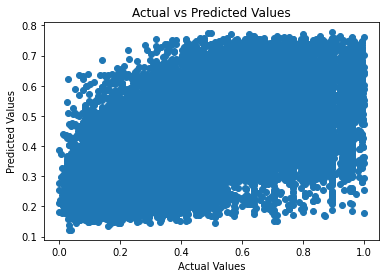

In [323]:
# Visualize the model's predictions compared to the actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()